# Naloga

## Za programerje

Detektiv je osem dni opazoval osumljenko. Prvi dan je nosila ogrlico s črkami WUMYDSR (na sliki). Drugi dan ZQRKJPIZ. Tretji DCYMSLWZ ... No, povejmo kar za vseh osem:

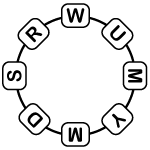

```
WUMYMDSR
ZQRKJPIZ
DCYMSLWZ
IXUGYZBB
SRWUMYMD
JKRQZZIP
OWAHBGVG
MYMUWRSD
```

Koliko različnih ogrlic ima? Osem? Ne. Peti dan je nosila isto ogrlico kot prvi, le malo drugače je bila zasukana. Pa tudi zadnji dan je nosila isto ogrlico, le da ni samo zasukana temveč tudi prezrcaljena (prvi dan si jo je nataknila čez glavo, osmi pa čez noge).

Napiši program, ki za podano datoteko pove, koliko različnih ogrlic vsebuje.

Vsebino datoteke boste najlažje prebrali z

```python
ogrlice = list(map(str.strip, open("ogrlice1000.txt")))
```

`ogrlice1000.txt` seveda zamenjate z imenom datoteke, ki jo želite brati.


## Za matematike ali programerje

Recimo, da ima osumljenka 1000 različnih ogrlic. Opazujemo jo 1000 dni. Koliko različnih ogrlic bomo videli?

Odgovor je seveda odvisen od sreče. Morda (a ne prav verjetno) vseh 1000, morda (a enako neverjetno) samo eno. Kakšno pa je *pričakovano število različnih ogrlic?? Če bi ta eksperiment velikokrat ponovili (večkrat opazujemo isto osumljenko za 1000 dni in preverimo, koliko različnih ogrlic je pokazala): koliko ogrlic bi videli v poprečju?

To se da izračunati ali simulirati.

# Kako je sestavljena naloga

Če koga zanima je tole program, ki je sestavil datoteki z ogrlicami.

In [1]:
import random
import string

def necklace(n):
    """Sestavi ogrlico, dolgo `n` znakov"""
    return "".join(random.choice(string.ascii_uppercase) for _ in range(n))

def scramble(necklace):
    """Obrni ogrlico za naključno število znakov; zrcali z verjetnostjo 50%"""
    shift = random.randint(1, len(necklace) - 2)
    return (necklace[shift:] + necklace[:shift])[::random.choice([-1, 1])]

def taskset(n, m, p, r):
    """
    Sestavi m + p + r ogrlic dolžine n, od tega m unikatnih.
    `r` je ogrlic ponovljenih trikrat, p - r pa dvakrat.
    
    Ogrlice so dovolj dolge, da ni verjetno, da bi slučajno dobili dve enaki.
    """
    necklaces = [necklace(n) for _ in range(m)]
    necklaces += map(scramble, necklaces[:p])
    necklaces += map(scramble, necklaces[:r])
    random.shuffle(necklaces)
    return necklaces
    
# Testne datoteke
for n, m, p, r in ((50, 15, 5, 0), (50, 975, 20, 5)):
    open(f"ogrlice{m + p + r}.txt", "wt").write("\n".join(taskset(n, m, p, r)))

# Rešitev

Preberimo podatke, da bodo na voljo za poganjanje spodnjih koščkov kode. Poleg tega si pripravimo še nekaj ogrlic.

In [2]:
ogrlice = list(map(str.strip, open("ogrlice1000.txt")))

ogrlica1 = "ABCDEF"
ogrlica1b = "CDEFAB"
ogrlica1c = "CBAFED"

ogrlica2 = "ACBDFE"  # ni enaka gornjim

ogrlica3 = "ABCXYZ"


Naloga ima dva problema: kako primerjati dve ogrlici in kako organizirati primerjanje, da ne bo potrebno primerjati vsake z vsako. Sam sem imel v mislih dve strategiji (vendar je ena prepočasna), v študentskih rešitvah pa sem videl še dve (vendar je ena napačna).

## Primerjanja parov

### Primerjanje z urejanjem

Napačna ideja je takšna: ogrlici `o1` in `o2` sta enaki, če velja `sorted(o1) == sorted(o2)`. To bi bilo res, če bi osumljenka občasno razdrla kakšno ogrlico in spremenila vrstni red kroglic. Gornji pogoj namreč preverja le, ali sta ogrlici sestavljeni iz enakih kroglic, ne glede na vrstni red. Problem je

In [3]:
sorted(ogrlica1) == sorted(ogrlica2)

True

Po drugi strani to *navadno* deluje, če so ogrlice dovolj dolge in je število različnih kroglic dovolj veliko. Iz 26 črk angleške abecede lahko sestavimo

In [4]:
26 ** 50

56061846576641933068511861128435847024473459936647893758520097689829376

ogrlic dolžine 50, torej je verjetnost, da bosta dve vsebovali enake črke enaka

In [5]:
2 ** -26

1.4901161193847656e-08

Če hočemo biti res prepričani, pa lahko rešimo nalogo tako, da najprej primerjamo urejene ogrlice, če zalotimo dve z enakimi kroglicami, pa s kako počasnejšo, a pravilno metodo preverimo, ali sta tudi res enaki. Nekatere študentske rešitve so bile v resnici narejene tako. Lepo.

### Primerjanje z vrtenjem

To je počasna rešitev, ki sem jo imel v mislih. Da preverimo, ali sta dve ogrlici enaki, pustimo eno pri miru, drugo pa vrtimo in opazujemo, ali je kateri od obratov enak.

Nalogo je najpreprosteje rešiti tako, da pripravimo "normirano" obliko ogrlice. Ogrlico dolžine $n$ je možno opisati na $2n$ načinov (malo verjetno je, da bi bila dva obrata slučajno enaka). Med vsemi $2n$ načini poiščemo tistega, ki je prvi po abecedi.

In [6]:
def same(o1, o2):
    for o2 in (o2, o2[::-1]):  # o2 bo taka kot je in še obrnjena
        for i in range(len(o2)):  # range(len(o2)) ... ker res potrebujem samo indekse, ne elementov :)
            if o2[i:] + o2[:i] == o1:
                return True
    return False

for o2 in [ogrlica1, ogrlica1b, ogrlica1c, ogrlica2, ogrlica3]:
    print(same(ogrlica1, o2))

True
True
True
False
False


Zadnji dve sta različni in to je prav. Ni pa hitro. Če je $n$ dolžina ogrlice, poskusimo n obratov ($\times 2$, a pustimo do) in v vsakem obratu na novo sestavimo ogrlico z $n$ kroglicami, torej je čas, potreben za primerjavo dveh ogrlic, sorazmeren $n^2$ (čas za primerjavo z urejanjem je bil sorazmeren hitrosti urejanja $n$ elementov, ta pa je $n\log n$, kar je precej manj). A to še ni tako hudo, bolj je nerodno, da to delamo za vsak par ogrlic -- razen, če se znajdemo kako drugače. Več o tem kasneje.

### Primerjanje s podvajanjem

Tole ni tako neobičajen trik, vendar nanj nisem pomislil. Pač pa je nanj pomislilo več študentov. Če ogrlico podvojimo, se v njej pojavijo tudi vsi njeni obrati.

In [7]:
def same(o1, o2):
    return o1 in o2 * 2 or o1 in o2[::-1] * 2

for o2 in [ogrlica1, ogrlica1b, ogrlica1c, ogrlica2, ogrlica3]:
    print(same(ogrlica1, o2))

True
True
True
False
False


Kako hitra pa je ta reč? Odvisna je od tega, kako deluje `in`. Naivna izvedba bi imela kvadratno časovno zahtevnost, tako kot gornje obračanje; v praksi bi seveda delovala bistveno hitreje, saj imamo 26 različnih znakov. Če koga zanima, pa je to primeren trenutek za reklamo za tri zele zanimive algoritme za iskanje podnizov: [Knuth-Morris-Prattov](https://en.wikipedia.org/wiki/Knuth%E2%80%93Morris%E2%80%93Pratt_algorithm), [Boyer-Moorov](https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_string-search_algorithm#Performance) in [Rabin-Karpov](https://en.wikipedia.org/wiki/Rabin%E2%80%93Karp_algorithm). Kaj od tega uporablja Python? V [kodi funkcije za iskanje](https://github.com/python/cpython/blob/master/Objects/stringlib/fastsearch.h) piše, da je to `a mix between boyer-moore and horspool, with a few more bells and whistles on the top`, zraven pa je še [povezava na detajle](http://effbot.org/zone/stringlib.htm).

Karkoli: tole je res hitro, težava metode pa je, da tudi to lahko uporabljamo le tako, da kličemo gornjo funkcijo `same` za vsak par ogrlic (razen, morda, za tiste, ki smo jih že izločili kot duplikate).

### Normalizacija

Ideja, ki sem jo imel v mislih jaz, pa je taka. Gremo čez vse ogrlice in vsako preobrnem oz. prezrcalimo v njeno "normalizirano" obliko. Ogrlico dolžine $n$ je možno opisati na $2n$ načinov. Med vsemi $2n$ načini poiščemo tistega, ki je prvi po abecedi in opis ogrlice zamenjamo z njim.

In [8]:
def normalize(necklace):
    """Vrne opis ogrlice, ki je prvi po abecedi."""
    shifted = []
    for shift in range(len(necklace)):
        shneck = necklace[shift:] + necklace[:shift]
        shifted += [shneck, shneck[::-1]]
    return min(shifted)

def same(o1, o2):
    return o1 == o2  # predpostavlja, da sta ogrlici v normalizirani obliki

Normalizacija zahteva kvadraten čas, vendar je dovolj, da jo opravimo le enkrat za vsako ogrlico. Primerjanje pa je potem trivialno, saj so vse enake ogrlice tudi zapisane enako. Predvsem pa nam po tem morda niti ne bo potrebno primerjati - vsaj ne eksplicitno.

Mimogrede se lahko spomnimo zanimivejšega (in drobno malenkost hitrejšega) načina vrtenja. Inspirira nas namreč podvojevanje seznama. V gornji funkciji `necklace[shift:] + necklace[:shift]` sestavi dva seznama (z rezanjem) in ju sešteje. Namesto tega lahko sestavimo dvojni seznam in režemo znotraj njega. Tako imamo namesto dveh rezin in enega seštevanja le eno rezino.

In [9]:
def normalize(necklace):
    """Vrne opis ogrlice, ki je prvi po abecedi."""
    shifted = []
    n = len(necklace)
    necklace *= 2  # podvojimo seznam!
    for shift in range(n):
        shneck = necklace[shift:shift + n]
        shifted += [shneck, shneck[::-1]]
    return min(shifted)

## Štetje unikatov

### Groba sila

Najpreprostejši način iskanja duplikatov je, da gremo čez seznam, vsako ogrlico primerjamo z vsemi, ki smo jih videli doslej in če je ni med njimi, smo našli nov unikat. Celotna rešitev (skupaj z učinkovito funkcijo `same`) bi bila potem takšna:

In [10]:
def same(o1, o2):
    return o1 in o2 * 2 or o1 in o2[::-1] * 2


unikatov = 0
for i, o1 in enumerate(ogrlice):
    for o2 in ogrlice[:i]:
        if same(o1, o2):
            break
    else:
        unikatov += 1

print(unikatov)

975


### Seznami (ali množice) nenormalnih ogrlic

Nekateri so se izognili notranji zanki (in, v bistvu, funkciji `same`) tako, da so sestavljali seznam že znanih ogrlic, ki ni vseboval le ogrlic v podani obliki temveč tudi vse obrate.

In [11]:
unikatov = 0
videne = []

for o1 in ogrlice:
    if o1 not in videne:
        unikatov += 1
        for o1 in (o1, o1[::-1]):
            for i in range(len(o1)):
                videne.append(o1[i:] + o1[:i])

print(unikatov)

975


To celo deluje in celo dokaj hitro - če pomislimo, da ima vsaka ogrlica 100 obratov (vključno z zrcaljenji), tako da imamo na koncu seznam (skoraj) 1000*100 = 100000 ogrlic in za vsako novo ogrlico mora Python preveriti, ali je kje v tem seznamu.

Gornji program se izvaja sekundo ali dve. Čez kako uro pa bomo izvedeli, da je program opazno hitrejši, če zamenjamo seznam z množico - le `[]` zamenjamo s `set()` in `append` z `add`, vse ostalo ostane enako.

In [12]:
unikatov = 0
videne = set()

for o1 in ogrlice:
    if o1 not in videne:
        unikatov += 1
        for o1 in (o1, o1[::-1]):
            for i in range(len(o1)):
                videne.add(o1[i:] + o1[:i])

print(unikatov)

975


### Seznami (ali množice) normalnih ogrlic

Zdaj pa še rešitev, ki sem jo imel v mislih: podobna je gornji, le da v množico ne damo vseh ogrlic temveč le ogrlico v obratu, ki je prvi po abecedi. Program bomo torej napisali tako, da bo najprej zamenjal seznam ogrlic s seznamom normaliziranih ogrlic, potem pa bo podoben gornjemu programu, le da ne bo vrtel ogrlic med dodajanjem in, predvsem, ne bo dodajal vseh obratov. Ker pomnilnik.

In [13]:
def normalize(necklace):
    """Vrne opis ogrlice, ki je prvi po abecedi."""
    shifted = []
    for shift in range(len(necklace)):
        shneck = necklace[shift:] + necklace[:shift]
        shifted += [shneck, shneck[::-1]]
    return min(shifted)

def all_normalized(necklaces):
    """Prejme seznam ogrlic in vrne seznam z normaliziranimi opisi."""
    normalized = []
    for necklace in necklaces:
        normalized.append(normalize(necklace))
    return normalized

def unique(s):
    """Prejme seznam in vrne seznam unikatnih elementov."""
    u = []
    for x in s:
        if x not in u:
            u.append(x)
    return u

print(len(unique(all_normalized(ogrlice))))

975


Od prihodnjega tedna bomo znali vse to opisati krajše.

In [14]:
def normalize(necklace):
    """Vrne opis ogrlice, ki je prvi po abecedi."""
    shifted = [necklace[shift:] + necklace[:shift] for shift in range(len(necklace))]
    shifted += [necklace[::-1] for necklace in shifted]
    return min(shifted)

def all_normalized(necklaces):
    """Prejme seznam ogrlic in vrne seznam z normaliziranimi opisi."""
    return [normalize(necklace) for necklace in necklaces]

def unique(s):
    """Prejme seznam in vrne seznam unikatnih elementov."""
    u = []
    for x in s:
        if x not in u:
            u.append(x)
    return u

print(len(unique(all_normalized(ogrlice))))

975


Že čez kako uro bomo izvedeli, da lahko `unique` naredimo tudi tako (le da tule vrne množico, kar pa je vseeno).

In [15]:
def unique(s):
    return set(s)

print(len(unique(all_normalized(ogrlice))))

975


Tako kratka funkcija seveda ni vredna funkcije. Celotna rešitev izziva, kot jo bomo pisali od prihodnjega tedna naprej, bo zato kar:

In [16]:
def normalize(necklace):
    """Vrne opis ogrlice, ki je prvi po abecedi."""
    shifted = [necklace[shift:] + necklace[:shift] for shift in range(len(necklace))]
    shifted += [necklace[::-1] for necklace in shifted]
    return min(shifted)

print(len({normalize(necklace) for necklace in ogrlice}))

975


Zadnjo vrstico lahko, če vam je bolj všeč, pišete tudi kot:

In [17]:
print(len(set(map(normalize, ogrlice))))

975


## Koliko različnih ogrlic vidimo?

Poleg čisto lepega algoritmičnega ozadja je za nalogo tudi nekaj matematike, verjetnosti, statistike. Vprašanje, ki bi si ga lahko zastavili, je tole: v 1000 dneh smo damo videli s 632 različnimi ogrlicami. Koliko različnih ogrlic ima potem (najbrž) v resnici?

Vendar si nismo zastavili tega vprašanja, temveč obratnega. Vemo, da ima 1000 ogrlic, opazovali smo jo 1000 dni in vprašanje je, koliko različnih ogrlic bomo (najbrž) opazili.

### Simulacija

Za odgovor na vprašanje ni potrebno sestavljati ogrlic. Dovolj je, da si predstavljamo, da imamo 1000 oštevilčenih ogrlic in namesto ogrlic izbiramo kar številke med 1 in 1000 ter jih dajemo v seznam, vendar vsako številko dodamo le, če je unikatna.

In [18]:
from random import randint

def razlicnih(n):
    ogrlice = []
    for i in range(n):  # n dni
        ogrlica = randint(1, n)
        if ogrlica not in ogrlice:
            ogrlice.append(ogrlica)
    return len(ogrlice)

In [19]:
razlicnih(1000)

643

Isto lahko delamo tudi z `numpy`-jem, če ga že ravno poznamo.

In [20]:
import numpy as np

def razlicnih(n):
    return len(np.unique(np.random.randint(1, n, n)))

razlicnih(1000)

626

Ali pa zamenjamo sezname z množicami. Poleg tega lahko uporabimo še, kar se bomo pravzaprav učili prihodnji teden.

In [21]:
def razlicnih(n):
    return len({randint(1, 1000) for _ in range(1000)})

razlicnih(1000)

636

Kakorkoli že definiramo funkcijo: vsakič vrne drugačno vrednost; pokličemo jo (recimo) desettisočkrat in iračunamo poprečje.

In [22]:
v = 0
for i in range(10000):  # 10000-krat ponovimo poskus
    v += razlicnih(1000)

v / 10000

632.3354

### Matematična rešitev

Imejmo `n` ogrlic. Kakšna je verjetnost, da posamično (recimo kar: prvo) izberemo vsaj enkrat? Verjetnost, da jo izberemo v prvem poskusu je $\frac{1}{n}$, verjetnost, da jo v drugem prav tako ... A s tem ne bomo prišli daleč. Lažje je izračunati, kakšna je verjetnost, da je *ne izberemo* v nobenem poskusu. Verjetnost, da je ne izberemo v prvem, je $1 - \frac{1}{n}$, verjetnost, da je ne v drugem, prav tako ... in tako naprej. Verjetnost, da je ne izberemo v nobenem od $n$ poskusov, je $\left(1 - \frac{1}{n}\right)^n$. Torej je verjetnost, da jo izberemo v vsaj enem, enaka $1 - \left(1 - \frac{1}{n}\right)^n$.

In [23]:
n = 1000
1 - (1 - 1 / n) ** n

0.6323045752290363

Imamo torej $n$ ogrlic in za vsako je verjetnost, da jo izberemo, enaka $1 - \left(1 - \frac{1}{n}\right)^n$. Skupaj torej izberemo $n \left(1 - \left(1 - \frac{1}{n}\right)^n\right)$ ogrlic.

In [24]:
n * (1 - (1 - 1 / n) ** n)

632.3045752290362

Spomnimo se lahko še, da velja $e = \lim\limits_{x \to 0 } {\left( {1 + x} \right)^{\frac{1}{x}}}$. Zamenjamo $x = -\frac{1}{n}$ in imamo dobimo $ \lim\limits_{n \to \infty } {\left( {1 - \frac{1}{n}} \right)^n} = e^{-1}$. Ko je $n$ primerno velik, bo verjetnost, da izberemo ogrlico, enaka $1 - e^{-1}$.

In [25]:
from math import exp
1 - exp(-1)

0.6321205588285577

Pričakovano število izbranih ogrlic je zato $n\left(1 - e^{-1}\right)$.

In [26]:
n * (1 - exp(-1))

632.1205588285577

Takšen način izbiranja se pogosto uporablja v statistiki (imenuje se [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))) in številka 0.632 je vsakemu, ki se ukvarja s statistiko ali umetno inteligenco dobro znana.